# Loading Data

In [54]:
import pandas as pd

churn_data = pd.read_csv("ChurnData.csv")
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,NaN,42,2,0.00,1,1,1,10134888.0,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,11254258.0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,11393157.0,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,0.0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,7908410.0,0


# Data Exploration

In [55]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           8571 non-null   object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  8576 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


As we can see from the above info, we have missing values in "Gender" and "EstimatedSalary" columns.

In [56]:
churn_data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender             1429
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary    1424
Exited                0
dtype: int64

In [57]:
churn_data[churn_data["Gender"].isna()] # Handle using dummy variables

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,NaN,42,2,0.00,1,1,1,10134888.00,1
7,8,15656148,Obinna,376,Germany,NaN,29,4,115046.74,4,1,0,11934688.00,1
14,15,15600882,Scott,635,Spain,NaN,35,7,0.00,2,1,1,6595165.00,0
21,22,15597945,Dellucci,636,Spain,NaN,32,8,0.00,2,1,0,13855546.00,0
28,29,15728693,McWilliams,574,Germany,NaN,43,3,141349.43,1,1,1,100187.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,9969,15733491,McGregor,512,Germany,NaN,40,8,153537.57,2,0,0,23101.13,0
9975,9976,15666295,Smith,610,Germany,NaN,50,1,113957.01,2,1,0,196526.55,1
9982,9983,15768163,Griffin,655,Germany,NaN,46,7,137145.12,1,1,0,115146.40,1
9989,9990,15605622,McMillan,841,Spain,NaN,28,4,0.00,2,1,1,179436.60,0


In [58]:
churn_data[churn_data["EstimatedSalary"].isna()] # Impute by median value

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
31,32,15706552,Odinakachukwu,533,France,Male,36,7,85311.70,1,0,1,NaN,0
38,39,15717426,Armstrong,850,France,Male,36,7,0.00,1,1,1,NaN,0
45,46,15754849,Tyler,776,Germany,Female,32,4,109421.13,2,1,1,NaN,0
52,53,15683553,O'Brien,788,France,Female,33,5,0.00,2,0,0,NaN,0
59,60,15804771,Velazquez,614,France,Male,51,4,40685.92,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,9972,15721377,Chou,833,France,Female,34,3,144751.81,1,0,0,NaN,0
9978,9979,15703563,P'eng,774,France,Male,40,9,93017.47,2,1,0,NaN,0
9985,9986,15586914,Nepean,659,France,Male,36,6,123841.49,2,1,0,NaN,0
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,NaN,0


In [59]:
churn_data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True) # Useless columns for our model

In [60]:
churn_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,8.576000e+03,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,1.376025e+05,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,1.227497e+06,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000e+00,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,5.127141e+04,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,1.005619e+05,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,1.494056e+05,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.009485e+08,1.000000


Mean, std, min and max values for all columns looks reasonable

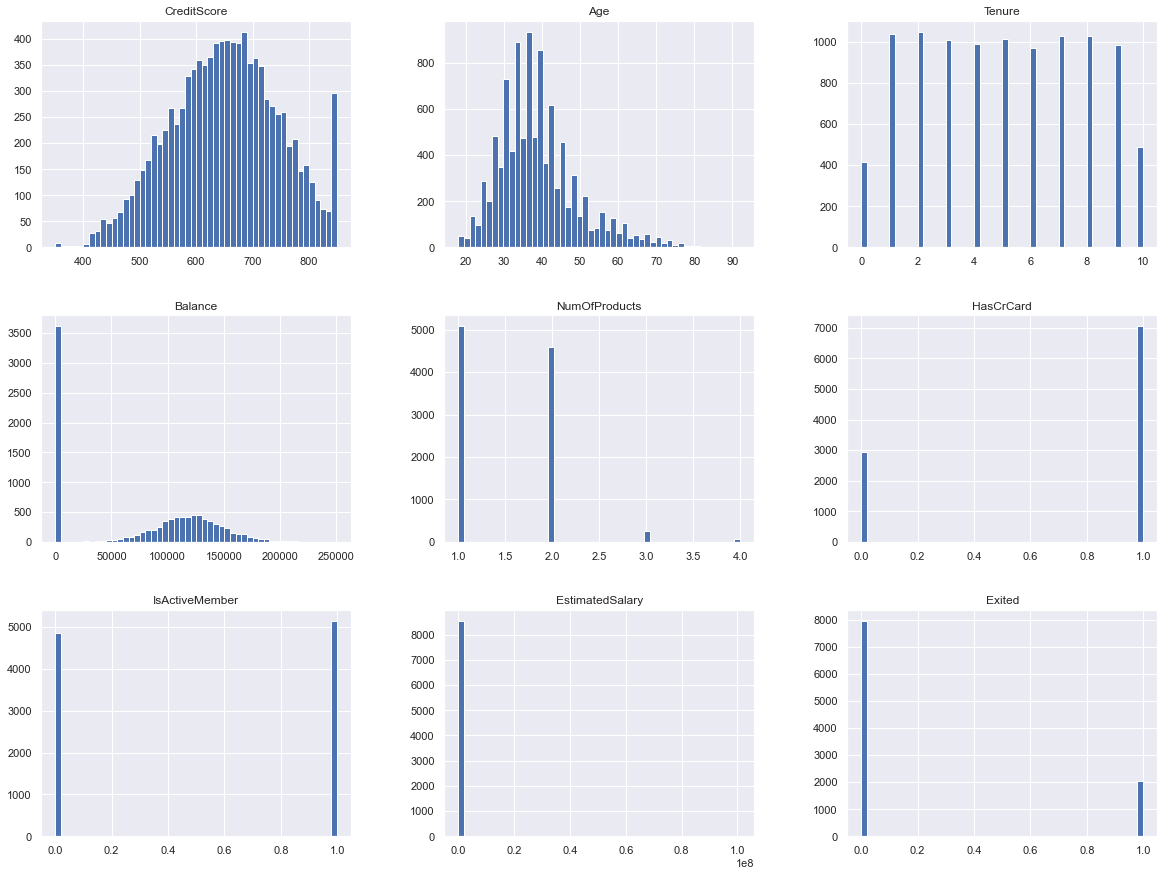

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

churn_data.hist(bins=50, figsize=(20, 15))
plt.show()

- credit score - it looks like the data is collected in a way that sets the upper limit of the credit score to 850.
- A lot of people have 0 balance in their account!
- Most people has either 1 or 2 products.
- Most people has credit card.
- Almost half of people has inactive membership.
- We have class inbalance, most people are not exited customers.

In [62]:
churn_data["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [63]:
print(len(churn_data[churn_data["Exited"] == 1]))
print(len(churn_data[churn_data["Exited"] == 0]))

2037
7963


# Looking for Correlations

In [64]:
# Compute the standard correlation coefficient; that is, Pearson's r
corr_matrix = churn_data.corr()
corr_matrix["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary   -0.000782
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

As we can see there is no column that is highly correlated with the churn status except for the age which still doesn't have a very high correlation with the churn status.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'CreditScore'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Tenure'),
  Text(3.5, 0, 'Balance'),
  Text(4.5, 0, 'NumOfProducts'),
  Text(5.5, 0, 'HasCrCard'),
  Text(6.5, 0, 'IsActiveMember'),
  Text(7.5, 0, 'EstimatedSalary'),
  Text(8.5, 0, 'Exited')])

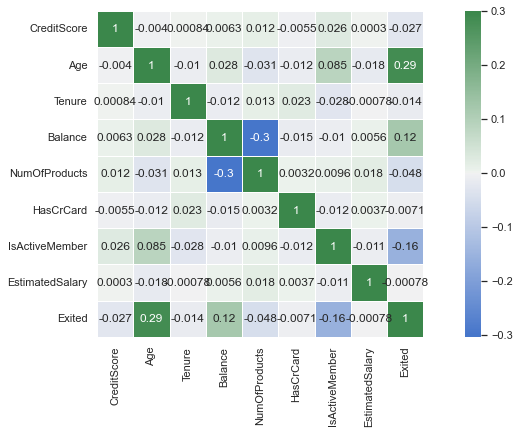

In [65]:
import seaborn as sns

sns.set(style="white")

churn_data_corr = churn_data.corr()

f, ax = plt.subplots(figsize=(15, 6))
cmap = sns.diverging_palette(255, 133, as_cmap=True)
sns.heatmap(churn_data_corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")

There is a little high correlation with the balance and the number of products as well but not high enough to remove one of them in training.

# Data Visualization

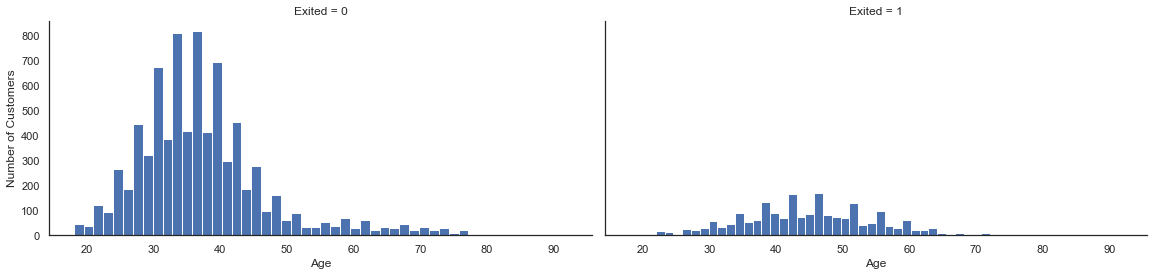

In [66]:
# Distribution of Age

age = sns.FacetGrid(data=churn_data, col='Exited', height=4, aspect=2)
age.map(plt.hist, 'Age', bins=50)
age.set(xlabel='Age', ylabel='Number of Customers')
plt.show()

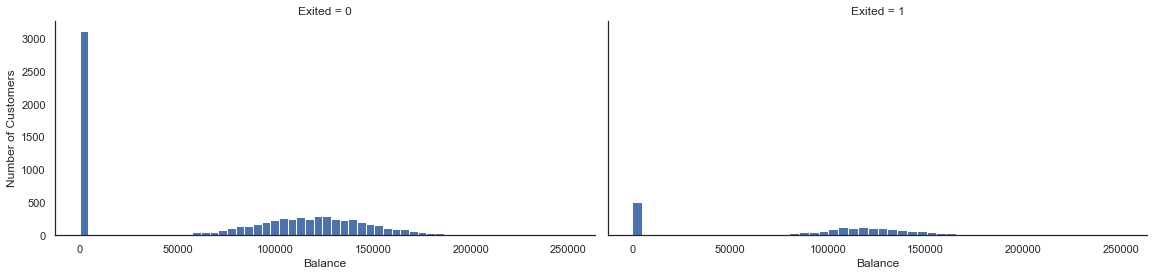

In [67]:
# Distribution of Balance

balance = sns.FacetGrid(data=churn_data, col='Exited', height=4, aspect=2)
balance.map(plt.hist, 'Balance', bins=50)
balance.set(xlabel='Balance', ylabel='Number of Customers')
plt.show()

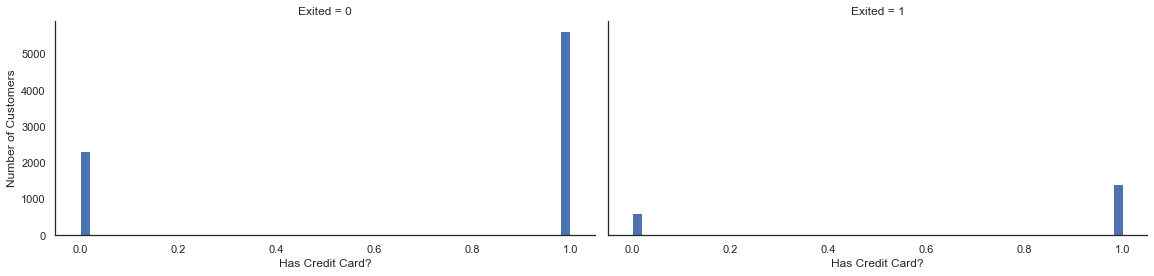

In [68]:
# Distribution of Has Crdit Card

has_credit_card = sns.FacetGrid(data=churn_data, col='Exited', height=4, aspect=2)
has_credit_card.map(plt.hist, 'HasCrCard', bins=50)
has_credit_card.set(xlabel='Has Credit Card?', ylabel='Number of Customers')
plt.show()

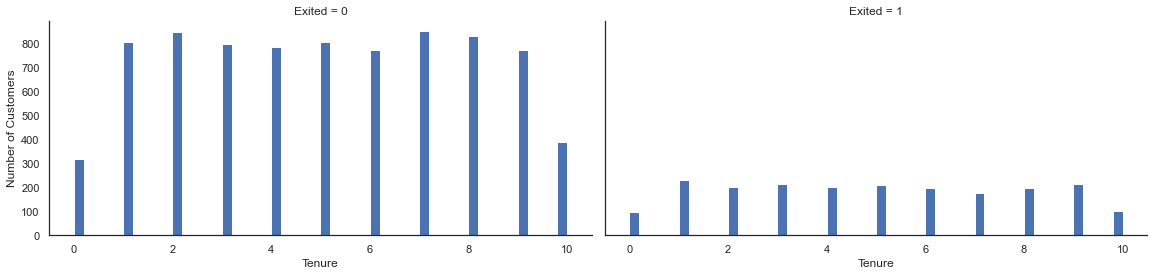

In [69]:
# Distribution of Tenure

tenure = sns.FacetGrid(data=churn_data, col='Exited', height=4, aspect=2)
tenure.map(plt.hist, 'Tenure', bins=50)
tenure.set(xlabel='Tenure', ylabel='Number of Customers')
plt.show()

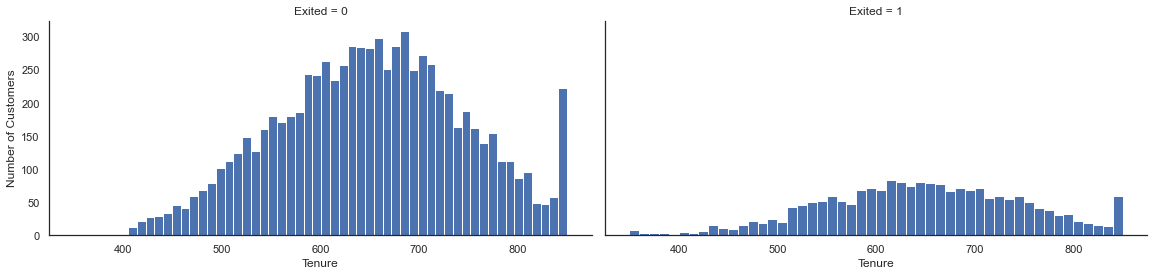

In [70]:
# Distribution of Credit Score

credit_score = sns.FacetGrid(data=churn_data, col='Exited', height=4, aspect=2)
credit_score.map(plt.hist, 'CreditScore', bins=50)
credit_score.set(xlabel='Tenure', ylabel='Number of Customers')
plt.show()

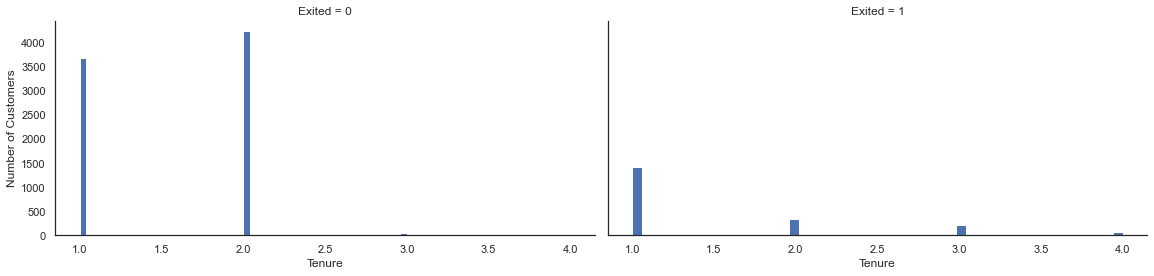

In [71]:
# Distribution of Number of Products

number_of_products = sns.FacetGrid(data=churn_data, col='Exited', height=4, aspect=2)
number_of_products.map(plt.hist, 'NumOfProducts', bins=50)
number_of_products.set(xlabel='Tenure', ylabel='Number of Customers')
plt.show()

As we can see, most of the customers that churn has only one product.

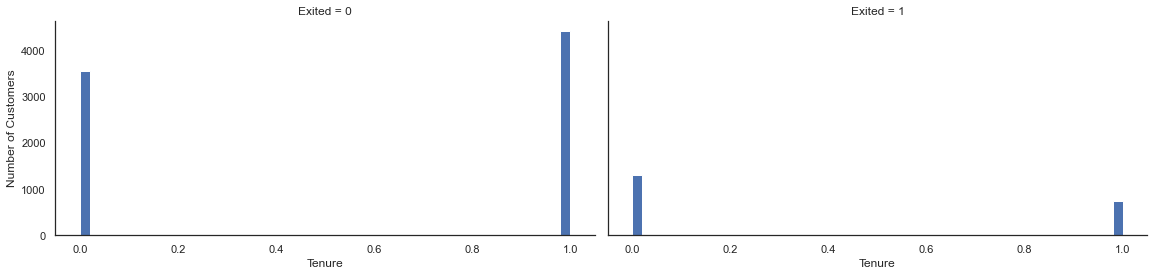

In [72]:
# Distribution of Is Active Member

is_active_member = sns.FacetGrid(data=churn_data, col='Exited', height=4, aspect=2)
is_active_member.map(plt.hist, 'IsActiveMember', bins=50)
is_active_member.set(xlabel='Tenure', ylabel='Number of Customers')
plt.show()

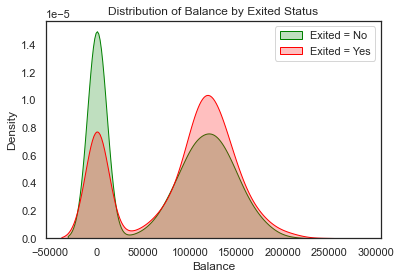

In [73]:
# Distribution of Balance by Exited Status

ax = sns.kdeplot(churn_data.Balance[churn_data["Exited"] == 0], color="Green", shade = True)
ax = sns.kdeplot(churn_data.Balance[churn_data["Exited"] == 1], ax =ax, color="Red", shade= True)
ax.legend(["Exited = No", "Exited = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Balance')
ax.set_title('Distribution of Balance by Exited Status')

# Figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

A lot of customers that has a high balance churn!

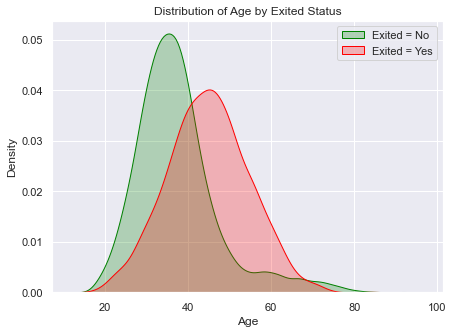

In [74]:
# Distribution of Age by Exited Status

ax = sns.kdeplot(churn_data.Age[churn_data["Exited"] == 0], color="Green", shade = True)
ax = sns.kdeplot(churn_data.Age[churn_data["Exited"] == 1], ax =ax, color="Red", shade= True)
ax.legend(["Exited = No", "Exited = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age by Exited Status')

# Figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

The churn rate increases as the age increases!

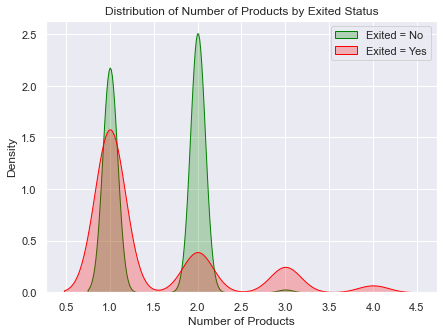

In [75]:
# Distribution of Number of Products by Exited Status

ax = sns.kdeplot(churn_data.NumOfProducts[churn_data["Exited"] == 0], color="Green", shade = True)
ax = sns.kdeplot(churn_data.NumOfProducts[churn_data["Exited"] == 1], ax =ax, color="Red", shade= True)
ax.legend(["Exited = No", "Exited = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Number of Products')
ax.set_title('Distribution of Number of Products by Exited Status')

# Figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

Most customer that exit has only one product which make sense.

In [76]:
import plotly.express as px

# Gender Count by Exited Status

fig = px.histogram(churn_data, x="Exited", color="Gender", barmode="group",  title="<b>Chrun Distribution w.r.t. Gender</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [77]:
print(churn_data[churn_data["Gender"] == "Female"]["Exited"].value_counts())
print(churn_data[churn_data["Gender"] == "Male"]["Exited"].value_counts())

0    2923
1     991
Name: Exited, dtype: int64
0    3872
1     785
Name: Exited, dtype: int64


Approximately 25% of females churn and 16% of males churn.

In [78]:
# Geography Count by Exited Status

fig = px.histogram(churn_data, x="Exited", color="Geography", barmode="group",  title="<b>Chrun Distribution w.r.t. Geographical Location</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [79]:
churn_data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [80]:
# Age Boxplot
fig = px.box(churn_data, x='Exited', y = 'Age')
fig.update_yaxes(title_text='Age', row=1, col=1)
fig.update_xaxes(title_text='Exited', row=1, col=1)
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Age vs Churn</b>',
)

fig.show()

As we can see, most customers that churn has age that ranges approximately from late thirties to late fifties.

In [81]:
# Balance Boxplot
fig = px.box(churn_data, x='Exited', y = 'Balance')
fig.update_yaxes(title_text='Balance', row=1, col=1)
fig.update_xaxes(title_text='Exited', row=1, col=1)
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Balance vs Churn</b>',
)

fig.show()

As we can see typical customers that churn have balance approximately starts with 40K.

In [82]:
for column in churn_data.columns:
    print(column, ": ", churn_data[column].unique())

CreditScore :  [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705

- Geography and Gender features will be transformed to one-hot encoded features instead of categorical features.
- Other columns except Exited will be scaled using standard scaler.